In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [5]:
## Drop,month,day and year 

df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## Independent and Dependent Features
X=df.drop('FWI',axis=1)
y=df['FWI']


In [12]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [13]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  Classes  region
 115           29  65  19   0.6  68.3   5.5   15.2   1.5   5.8        0       0
 207           33  37  16   0.0  92.2  61.3  167.2  13.1  64.0        1       1
 158           38  43  13   0.5  85.0  13.0   35.4   4.1  13.7        1       1
 132           31  42  21   0.0  90.6  18.2   30.5  13.4  18.0        1       1
 84            34  64  14   0.0  88.9  40.5  171.3   9.0  50.9        1       0
 ..           ...  ..  ..   ...   ...   ...    ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9    7.3   0.2   1.4        0       0
 14            28  80  17   3.1  49.4   3.0    7.4   0.4   3.0        0       0
 92            25  76  17   7.2  46.0   1.3    7.5   0.2   1.8        0       0
 179           34  59  16   0.0  88.1  19.5   47.2   7.4  19.5        1       1
 102           30  77  21   1.8  58.5   1.9    8.4   1.1   2.4        0       0
 
 [194 rows x 11 columns],
      Temper

<Axes: >

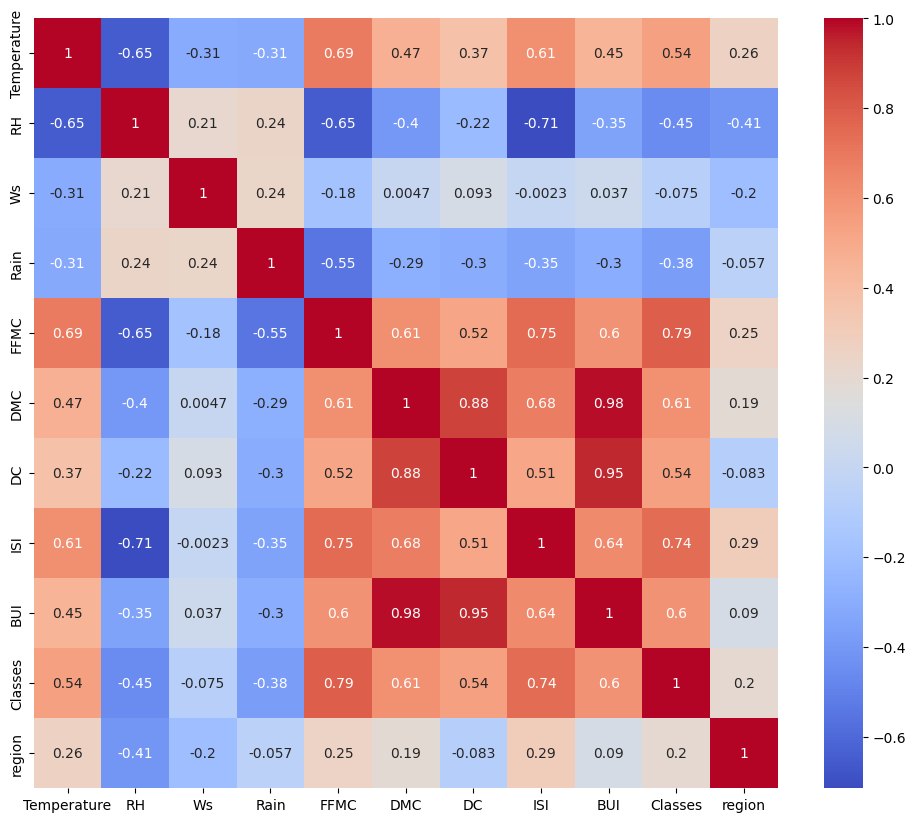

In [17]:
## Check for multicollinearity 

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features=correlation(X_train, 0.85)

In [28]:
## drop features when correlation is more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)

In [26]:
X_test.drop(corr_features,axis=1,inplace=True)


In [30]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

## Box plot to understand effect of Standard Scaler

Text(0.5, 1.0, 'X_train after Scaling ')

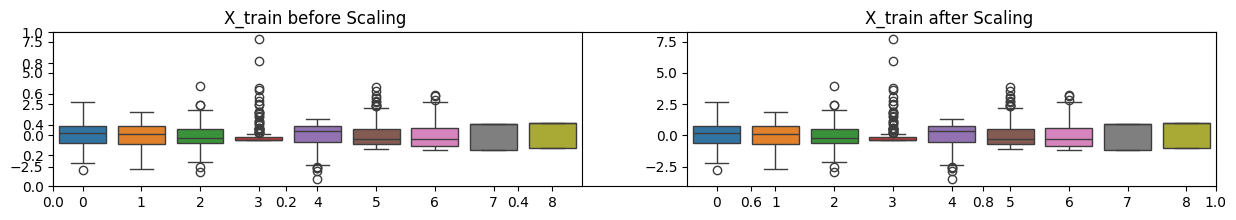

In [40]:
plt.subplots(figsize=(15,2))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling ")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling ")

Mean Absolute Error: 0.5049978694165688
R2 Score: 0.9805895859259882


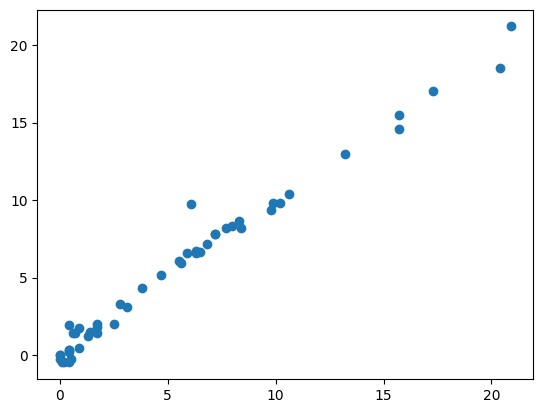

In [43]:
## Linear Regression Model  

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)

Mean Absolute Error: 1.0093958923873405
R2 Score: 0.9430507350726564


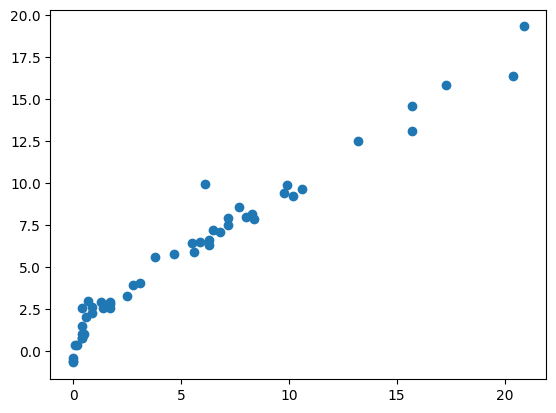

In [44]:
## Apply the lasso Regression 


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)

Mean Absolute Error: 0.5192048325844755
R2 Score: 0.9801058063273601


/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


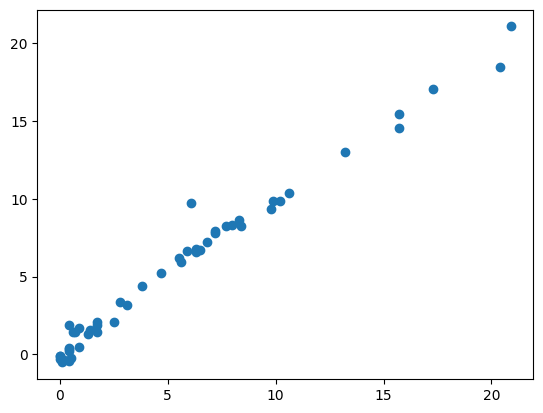

In [45]:
## Ridge Regression


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)

Mean Absolute Error: 1.6834416340136709
R2 Score: 0.8676961352267807


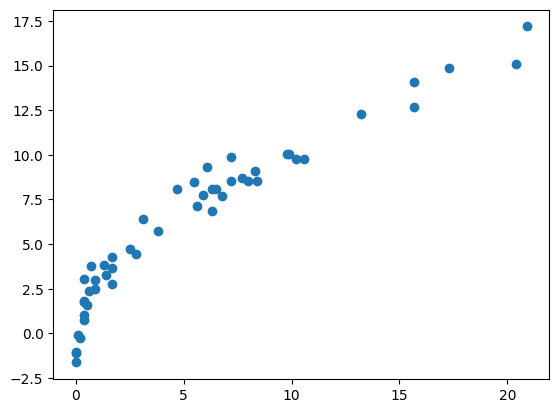

In [46]:
# Elastic Net Model  

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

enr=ElasticNet()
enr.fit(X_train_scaled,y_train)
y_pred=enr.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)

In [48]:
## Cross Validation lasso 

from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)

lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [49]:
y_pred=lassocv.predict(X_test_scaled)


In [50]:
y_pred

array([ 8.18663266,  7.70019213, -0.2903297 ,  4.63474259,  6.74887378,
        1.69185044,  2.18294469,  7.60463301,  1.94706338,  3.35359404,
        0.57397807,  9.87337629,  9.35427849, 17.02676621, 18.37194357,
        1.5304227 ,  1.5960953 , -0.52728438,  7.28818222,  3.05013272,
        1.90263103,  0.19405617,  6.49047095,  0.15979868, 21.13853803,
        5.07328595,  5.85087005,  9.77439514, -0.62816931,  9.93571457,
        6.72518268, -0.36716153, 10.34290458, 14.4714937 ,  1.65446616,
        0.7459854 ,  2.01575197,  5.92456507, -0.59756537, -0.52186736,
        6.46663487,  2.01373643,  8.46819727, -0.73832638, 15.45949352,
        8.33848004,  8.45866066,  1.4244129 , 13.0465774 ])

In [51]:
lassocv.alpha_

np.float64(0.04391080246587261)

In [54]:
lassocv.mse_path_.shape

(100, 5)

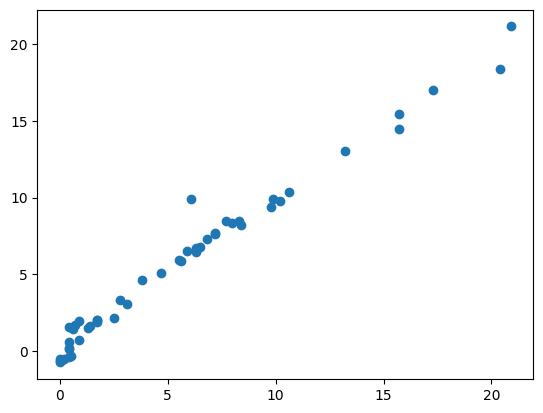

In [55]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)

ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)



/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS_ML_DL_NLP_BOOTCAMP/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/anupdangi/Desktop/AnupAI/Research/DS

RidgeCV(cv=5)

Mean Absolute Error: 0.555671503161787
R2 Score: 0.978328234520343


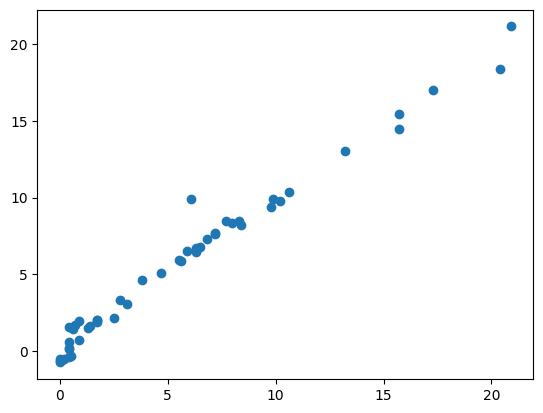

In [57]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)

Mean Absolute Error: 0.5710147088777218
R2 Score: 0.9781014571778188


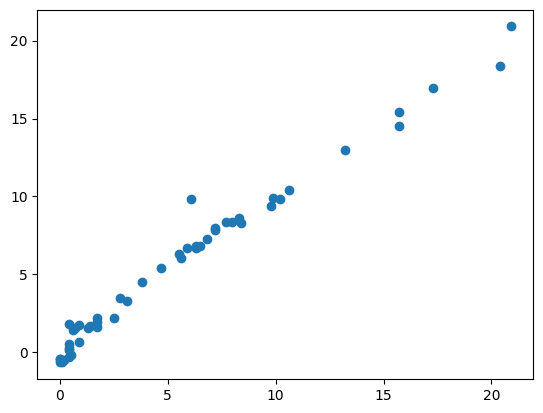

In [60]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv=ElasticNetCV(cv=5)
y_pred=elasticnetcv.fit(X_train_scaled,y_train).predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)

plt.scatter(y_test,y_pred)